In [28]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
measures = pd.read_csv('../data/cleaned.csv')
measures.sample(5)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
158,6.1,6.3,26,21.5,5,E10,0,0,0
369,5.5,3.7,33,24.5,28,SP98,0,0,1
69,11.8,4.5,37,21.5,4,SP98,1,0,0
182,130.3,4.6,85,22.0,12,E10,0,0,0
302,11.5,5.3,53,22.0,15,SP98,0,0,0


In [8]:
measures['gas_type'].value_counts()

gas_type
SP98    219
E10     157
Name: count, dtype: int64

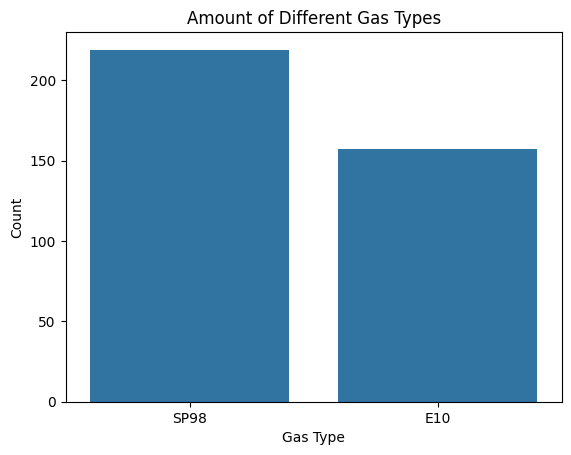

In [10]:
gas_type_counts = measures['gas_type'].value_counts().reset_index()
gas_type_counts.columns = ['Gas Type', 'Count']

sns.barplot(x='Gas Type', y='Count', data=gas_type_counts)

plt.xlabel('Gas Type')
plt.ylabel('Count')
plt.title('Amount of Different Gas Types')

plt.show()

The bar chart shows the counts of SP98 and E10 gas types in the dataset, with SP98 being more prevalent than E10.

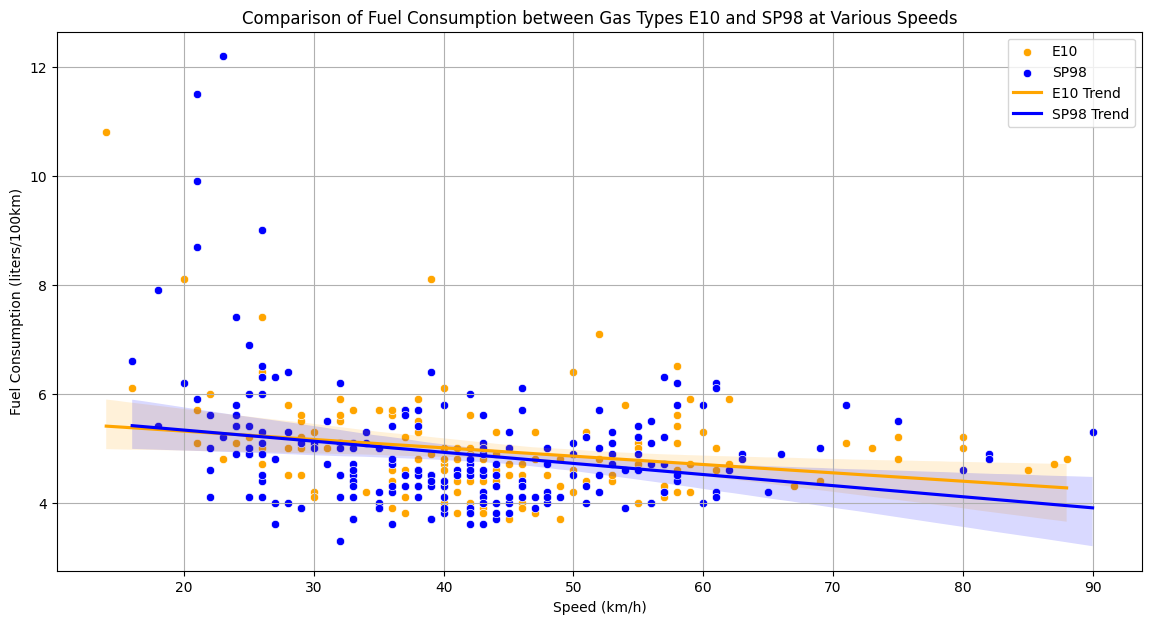

In [19]:
plt.figure(figsize=(14, 7))

sns.scatterplot(data=measures[measures['gas_type'] == 'E10'], x='speed', y='consume', color='orange', label='E10')
sns.scatterplot(data=measures[measures['gas_type'] == 'SP98'], x='speed', y='consume', color='blue', label='SP98')

sns.regplot(data=measures[measures['gas_type'] == 'E10'], x='speed', y='consume', scatter=False, color='orange', label='E10 Trend')
sns.regplot(data=measures[measures['gas_type'] == 'SP98'], x='speed', y='consume', scatter=False, color='blue', label='SP98 Trend')

plt.title('Comparison of Fuel Consumption between Gas Types E10 and SP98 at Various Speeds')
plt.xlabel('Speed (km/h)')
plt.ylabel('Fuel Consumption (liters/100km)')
plt.legend()
plt.grid(True)
plt.show()

The plot above compares the fuel consumption for gas types E10 (orange) and SP98 (blue) at various speeds, with regression lines indicating the trends. The trend lines suggest how consumption might change as speed varies for each type of gas.

In [26]:
dummies = pd.get_dummies(measures['gas_type'], prefix='gas_type')
measures_with_dummies = pd.concat([measures.drop('gas_type', axis=1), dummies], axis=1)

correlation_with_consume = measures_with_dummies.corr()['consume'].sort_values(ascending=False)

correlation_with_consume

consume          1.000000
rain             0.247699
AC               0.093892
gas_type_E10     0.020928
gas_type_SP98   -0.020928
distance        -0.131379
temp_inside     -0.161991
sun             -0.169173
speed           -0.234537
temp_outside    -0.318758
Name: consume, dtype: float64

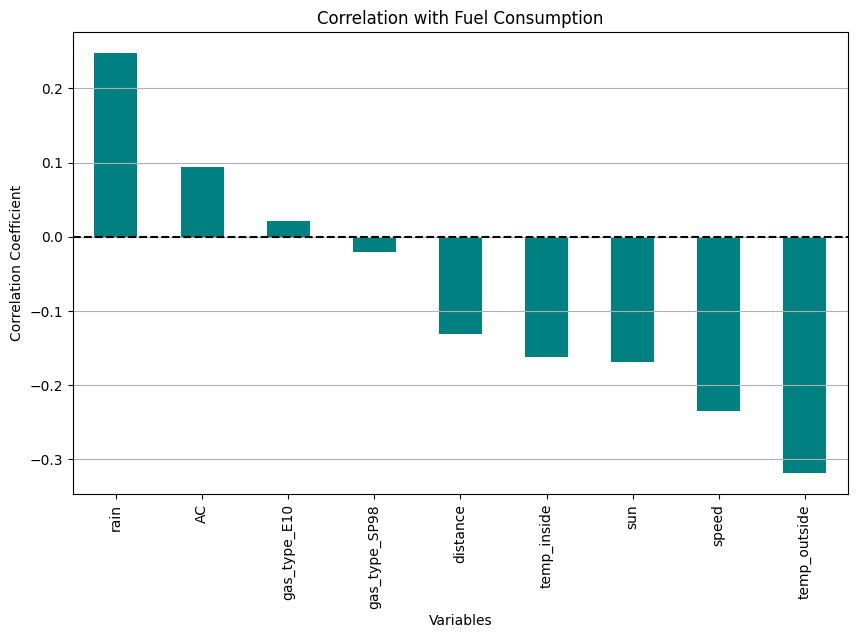

In [27]:
plt.figure(figsize=(10, 6))
correlation_with_consume.drop('consume').plot(kind='bar', color='teal')
plt.title('Correlation with Fuel Consumption')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='k', linestyle='--')
plt.grid(axis='y')
plt.show()

The bar plot illustrates how different factors correlate with fuel consumption. Positive correlations like 'rain' and 'AC' suggest increased consumption, while negative correlations like 'temp_outside', 'speed', and 'sun' indicate reduced consumption.

In [29]:
X = measures_with_dummies.drop('consume', axis=1)
y = measures_with_dummies['consume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.7431058630403026, 0.27371709232971264)

In [30]:
model_coefficients = pd.Series(model.coef_, index=X_train.columns)

gas_type_coefficients = model_coefficients.filter(like='gas_type')

gas_type_coefficients

gas_type_E10     0.026729
gas_type_SP98   -0.026729
dtype: float64

In the linear regression model, the negative coefficient for 'gas_type_SP98' suggests it is more fuel-efficient than E10, as SP98 is associated with lower fuel consumption compared to E10